In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf
import pandas as pd
import os
import json
import gzip
import re
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = '../data/ratings/Appliances.csv'

col_names = ['Item ID', 'User ID', 'Rating', 'Timestamp']

df = pd.read_csv(data, names = col_names)

In [3]:
df

,Item ID,User ID,Rating,Timestamp
0,1118461304,A3NHUQ33CFH3VM,5.0,1385510400
1,1118461304,A3SK6VNBQDNBJE,5.0,1383264000
2,1118461304,A3SOFHUR27FO3K,5.0,1381363200
3,1118461304,A1HOG1PYCAE157,5.0,1381276800
4,1118461304,A26JGAM6GZMM4V,5.0,1378512000
...,...,...,...,...
602772,B01HJH2PY0,A24A9P4F2SLTK5,5.0,1502323200
602773,B01HJHHEA0,A2JCB4KHBWEELW,2.0,1533081600
602774,B01HJHHEA0,A1LDYYVTLPP2Z5,5.0,1523577600
602775,B01HJH92JQ,AP1M5O06IOYZ7,1.0,1521763200


In [4]:
times = df['Timestamp']

print(len(times))

for i in range(len(times)):
    times[i] = datetime.datetime.fromtimestamp(times[i]) # This will give a warning, but does do what I need it to
    # times.replace(times[i], datetime.datetime.fromtimestamp(times[i]))

602777


/tmp/ipykernel_5128/2913038016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times[i] = datetime.datetime.fromtimestamp(times[i]) # This will give a warning, but does do what I need it to


In [5]:
times

0         2013-11-26 16:00:00
1         2013-10-31 17:00:00
2         2013-10-09 17:00:00
3         2013-10-08 17:00:00
4         2013-09-06 17:00:00
                 ...         
602772    2017-08-09 17:00:00
602773    2018-07-31 17:00:00
602774    2018-04-12 17:00:00
602775    2018-03-22 17:00:00
602776    2018-01-07 16:00:00
Name: Timestamp, Length: 602777, dtype: object

In [41]:
df = df.drop(labels = 'Timestamp', axis = 1)
df = pd.concat([df,times], axis = 1)
df = df.sort_values('Timestamp')
df

,Item ID,User ID,Rating,Timestamp
474132,B00004X18E,A3MR51MDYU0KXJ,4.0,2000-10-22 17:00:00
356,B00005OU6T,A1LA5EF74R5L75,4.0,2001-11-07 16:00:00
595,B00005OU6T,A1HRXDQ7WUWC2Q,1.0,2002-02-06 16:00:00
1356,B00006JKZX,A265AD454EY8D3,4.0,2003-08-25 17:00:00
590737,B0000CFF2X,A3GBQXQWIT78SL,2.0,2003-11-29 16:00:00
...,...,...,...,...
602583,B01HFCVU9K,A18QU0G79DE8ZV,1.0,2018-10-01 17:00:00
602110,B01GXOY74Q,A3RE7ALMEFZ2C1,5.0,2018-10-01 17:00:00
601957,B01GVLWZT0,A7GU6YT10BXEJ,2.0,2018-10-01 17:00:00
602710,B01HICGMWC,A25UZ9POZ7SFUW,2.0,2018-10-03 17:00:00


In [64]:
def get_five_core_data(directory):
    five_core = {}
    
    # Iterate through the data in the given directory
    for subdir, dirs, files in os.walk(directory):

        # For each file, get the filename and extract the JSON
        for file in files:
            filename = str(os.path.join(subdir, file))
            five_core_data = []
            # Use gzip to open the .gz and extract each line using the normal file package
            with gzip.open(filename, "rb") as f:
                for line in f:
                    line = line.decode(encoding='UTF-8')
                    json_data = json.loads(line)
                    five_core_data.append(json_data)
            # Add data to the dict
            five_core[filename] = five_core_data
           
    # Return the dict of complete ratings from each file
    return five_core

def get_ratings_data(directory):
    ratings = {}
    col_names = ['Item ID', 'User ID', 'Rating', 'Timestamp']
    
    # Iterate through the data in the given directory
    for subdir, dirs, files in os.walk(directory):

        # For each file, get the filename and extract the DF
        for file in files:
            filename = str(os.path.join(subdir, file))
            # Create a DF of the data and add it to the dict
            df = pd.read_csv(filename, names = col_names)
            times = df['Timestamp']
            for i in range(len(times)):
                times[i] = datetime.datetime.fromtimestamp(times[i]).date()
            df = df.drop(labels = 'Timestamp', axis = 1)
            df = pd.concat([df,times], axis = 1)
            df = df.sort_values('Timestamp')
            ratings[filename] = df
           
    # Return the dict of complete ratings from each file
    return ratings

In [65]:
five_core = get_five_core_data('../data/5-core/')

In [66]:
for i in five_core:
    print(len(i))
five_core.keys()

35
47


dict_keys(['../data/5-core/Appliances_5.json.gz', '../data/5-core/Magazine_Subscriptions_5.json.gz'])

In [67]:
# Find most frequently used words
# get_five_core_data for a relevant dataset -> may want to enable singular datasets
# Get keys of 5 core data
# Change keys to a list
# Get 'reviewText'
# Get counts of each word in reviewText and put into dict (there is a lab on this)
# Sort dict by values
# Show 10 most commonly used words for that dataset
five_core[list(five_core.keys())[0]][0].keys()

dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])

In [69]:
def get_most_used_words(directory):
    five_core = get_five_core_data(directory)
    five_core_keys = list(five_core.keys())
    counts = {}
    
    for key in five_core_keys:
        for i in range(len(five_core[key])):
            review_text = five_core[key][i].get('reviewText')
            if review_text is not None:
                review_words = review_text.split()

                for word in review_words:
                    lower_word = re.sub(r'[^\w\s]', '', word.lower())
                    counts[lower_word] = counts.get(lower_word, 0) + 1
                    
    counts_list = sorted(counts.items(), key=lambda x:x[1])
    
    return counts_list[-10:]

test = get_most_used_words('../data/5-core/')

In [70]:
test

[('this', 8314),
 ('in', 9825),
 ('you', 9991),
 ('it', 13299),
 ('of', 14795),
 ('a', 18373),
 ('to', 22614),
 ('i', 22681),
 ('and', 24479),
 ('the', 49519)]

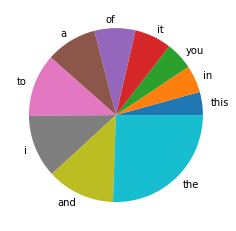

In [71]:
# Pie chart of most frequently used words
counts = []
labels = []
for i in range(len(test)):
    counts.append(test[i][1])
    labels.append(test[i][0])
plt.pie(counts, labels = labels)
plt.show() 

In [72]:
# Average rating vs Amazon stock price

In [80]:
# Average rating over time
# Stock price over time

AMZN = yf.download(tickers = 'AMZN', period = '10Y', interval = '1d')
ratings = get_ratings_data('../data/ratings/')
ratings_keys = list(ratings.keys())
AMZN.index

[*********************100%***********************]  1 of 1 completed


DatetimeIndex(['2012-12-10', '2012-12-11', '2012-12-12', '2012-12-13',
               '2012-12-14', '2012-12-17', '2012-12-18', '2012-12-19',
               '2012-12-20', '2012-12-21',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09'],
              dtype='datetime64[ns]', name='Date', length=2519, freq=None)

In [74]:
ratings[ratings_keys[0]]

,Item ID,User ID,Rating,Timestamp
16558,B00005N7VP,A2B8GXSCB1R05T,5.0,2001-10-25
23453,B00005NIOA,A2JBXFYTC8W8VY,4.0,2001-10-25
23454,B00005NIOA,A16G8RXC8UDBJZ,5.0,2001-10-25
16118,B00005N7QJ,A3P3TOKPHYAA5Q,4.0,2001-10-25
24197,B00005NIPI,A2EZX9HBOINY8G,4.0,2001-10-25
...,...,...,...,...
89268,B01CF3ECNK,A3C99BDDEK6RSD,2.0,2018-09-11
89537,B01F2MKW0I,A2DVJSVEKN34C5,5.0,2018-09-12
89267,B01CF3ECNK,A2TOSPPTRAAMFN,2.0,2018-09-12
89266,B01CF3ECNK,A38SMHC969ZQP7,5.0,2018-09-13


In [81]:
ratings[ratings_keys[0]]['Timestamp']

16558    2001-10-25
23453    2001-10-25
23454    2001-10-25
16118    2001-10-25
24197    2001-10-25
            ...    
89268    2018-09-11
89537    2018-09-12
89267    2018-09-12
89266    2018-09-13
89265    2018-09-18
Name: Timestamp, Length: 89689, dtype: object

<AxesSubplot:xlabel='Date'>

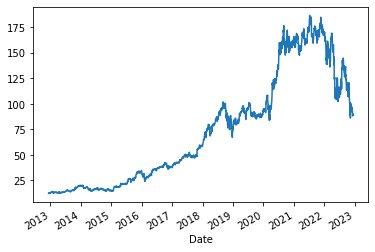

In [82]:
# Linear regression of stock price over time
AMZN['Adj Close'].plot()

<AxesSubplot:>

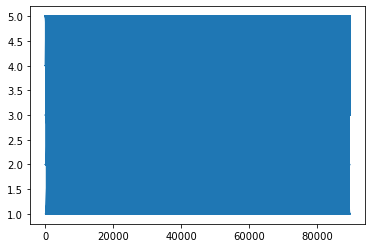

In [84]:
ratings[ratings_keys[0]]['Rating'].plot()